<a href="https://colab.research.google.com/github/PWRScript/afterschool-machine-learning/blob/main/exercicios/Aula%204%20-%20Exerc%C3%ADcio%20parcialmente%20resolvido%20-%20Preveja%20a%20classifica%C3%A7%C3%A3o%20de%20um%20dado%20curso%20da%20Udemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício parcialmente resolvido

## Enunciado

Neste exercício, pretendemos prever a classificação de um dado curso da [Udemy](https://www.udemy.com/). Para tal, vamos ter em consideração diversas informações sobre  o curso, tais como o número de aulas, o número de testes e o preço.

## Dados

* Número de observações = 13608
* Número de variáveis independentes = 10
 1. id = número de identificação
 1. title = título
 1. is_paid = curso pago (True) ou gratuito (False)
 1. num_subscribers = número de utilizadores inscritos
 1. num_reviews = número de avaliações feitas pelos utilizadores
 1. num_published_lectures = número de aulas
 1. num_published_practice_tests = número de testes
 1. discount_price_amount = valor do desconto
 1. price_detail__amount = preço
 1. price_detail__currency = moeda
* Número de variáveis dependentes = 1
 1. avg_rating = classificação do curso (escala de 0 a 5)

Dados disponíveis em: https://raw.githubusercontent.com/pmarcelino/datasets/master/udemy_01.csv

## Instruções

Resolve o exercício tendo em consideração as pistas deixadas, como comentário, ao longo do código. Para tal, basta substituir os comentários com `[ ]` pelas instruções corretas. Algumas partes do exercício já estão resolvidas e, como tal, não requerem qualquer alteração.

# Resolução

In [27]:
# Importar bibliotecas
import pandas as pd
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

## 1. Preparar dados

In [28]:
# Importar dados

url = "https://raw.githubusercontent.com/pmarcelino/datasets/master/udemy_01.csv"
data = pd.read_csv(url)
data

,id,title,is_paid,num_subscribers,avg_rating,num_reviews,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount,price_detail__currency
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,True,295509,4.66019,78006,84,0,455.0,8640.0,INR
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,True,209070,4.58956,54581,78,0,455.0,8640.0,INR
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,True,155282,4.59491,52653,292,2,455.0,8640.0,INR
3,648826,The Complete Financial Analyst Course 2020,True,245860,4.54407,46447,338,0,455.0,8640.0,INR
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,True,374836,4.47080,41630,83,0,455.0,8640.0,INR
...,...,...,...,...,...,...,...,...,...,...,...
13603,3005408,מושגים בסיסיים באופציות חלק ב,False,47,0.00000,0,6,0,NaN,NaN,NaN
13604,3467284,Programa de Integridade,False,19,0.00000,0,5,0,NaN,NaN,NaN
13605,3368222,Goodwill and Method of Calculating Goodwill (A...,False,47,0.00000,0,5,0,NaN,NaN,NaN
13606,3211345,Poderoso Investidor,False,48,0.00000,0,13,0,NaN,NaN,NaN


In [29]:
# Verificar se há dados em falta

data.isnull().sum()

id                                 0
title                              0
is_paid                            0
num_subscribers                    0
avg_rating                         0
num_reviews                        0
num_published_lectures             0
num_published_practice_tests       0
discount_price__amount          1403
price_detail__amount             497
price_detail__currency           497
dtype: int64

In [30]:
# Eliminar observações com dados em falta (caso necessário)

data = data.dropna()

In [31]:
# Verificar se há dados em falta (caso necessário)

data.isnull().sum()

id                              0
title                           0
is_paid                         0
num_subscribers                 0
avg_rating                      0
num_reviews                     0
num_published_lectures          0
num_published_practice_tests    0
discount_price__amount          0
price_detail__amount            0
price_detail__currency          0
dtype: int64

## 2. Explorar dados

In [32]:
# Verificar se há erros e anomalias

data.describe()

,id,num_subscribers,avg_rating,num_reviews,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount
count,1.220500e+04,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,1.663674e+06,2858.483818,3.932067,247.382220,32.870463,0.115035,493.943794,4616.468660
std,9.430212e+05,9458.534381,0.999380,1639.713806,43.296882,0.635486,267.827260,3027.637583
min,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,455.000000,1280.000000
25%,8.490300e+05,65.000000,3.800000,8.000000,12.000000,0.000000,455.000000,1600.000000
50%,1.597114e+06,558.000000,4.187500,24.000000,22.000000,0.000000,455.000000,3200.000000
75%,2.470024e+06,2273.000000,4.450000,86.000000,38.000000,0.000000,455.000000,8640.000000
max,3.482886e+06,374836.000000,5.000000,78006.000000,699.000000,6.000000,3200.000000,11520.000000


In [33]:
# Remover observações com erros, anomalias e valores que não interessem para efeitos de análise (se necessário)

# [código]

In [34]:
# Verificar se há erros e anomalias (se necessário)

# [código]

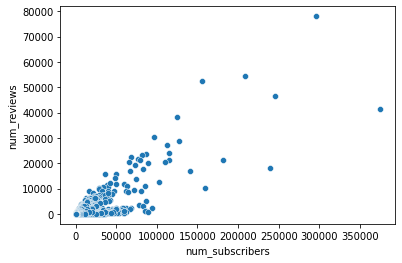

In [35]:
# Visualizar relação entre num_subscribers e num_reviews, usando um scatterplot

sb.scatterplot(x="num_subscribers", y="num_reviews", data=data)

* A relação presente no gráfico faz sentido?

## 3. Treinar modelo

In [43]:
# Codificar variáveis (se necessário)

In [50]:
# Definir variáveis independentes e dependente

x = data.drop(['avg_rating', 'is_paid', 'id', 'title', 'price_detail__currency'], axis=1)
y = data["avg_rating"]

In [51]:
# Dividir dados em conjunto de dados de treino e de teste

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)

In [52]:
# Definir algoritmo do modelo

model = RandomForestRegressor(random_state=33)

In [53]:
# Treinar o modelo

model.fit(x_train,y_train)

RandomForestRegressor(random_state=33)

# 4. Avaliar modelo

In [54]:
# Fazer previsões
y_pred = model.predict(x_test)

In [55]:
# Avaliar modelo usando o coeficiente de determinação como medida de avaliação
r2_score(y_test, y_pred)

0.756523723281796